In [1]:
import pandas as pd
import load_data

In [2]:
df = load_data.get_df()

In [3]:
df.shape

(734, 3)

In [4]:
df.columns

Index(['URLS', 'Headline', 'Article'], dtype='object')

In [5]:
df.head()

,URLS,Headline,Article
0,/business/economy/opinion/news/averting-fiscal...,Averting fiscal crises in a deteriorating glob...,The war in Ukraine and aftershocks from the Co...
1,/opinion/views/news/remembering-the-queens-leg...,"In remembering the 'Queen's legacy', why do we...",When news broke of the death of Queen Elizabet...
2,/news/bangladesh/news/temple-idol-vandalised-j...,Temple idol vandalised in Jhenidah,Unidentified miscreants vandalised an idol of ...
3,/news/bangladesh/crime-justice/news/attack-bcl...,"""Attack on BCL men"": 24 Chhatra Odhikar Parish...",A Dhaka court has sent 24 leaders and activist...
4,/opinion/views/news/shanghai-cooperation-organ...,Shanghai Cooperation Organization Summit 2022:...,The Shanghai Cooperation Organization's (SCO) ...


#### Preliminary text exploration

In [6]:
# Fetch the word_cound for each headline
df['word_count_headline'] = df['Headline'].apply(
    lambda x: len(str(x).split(" "))
)

In [7]:
df[['Headline','word_count_headline']].head(10)

,Headline,word_count_headline
0,Averting fiscal crises in a deteriorating glob...,9
1,"In remembering the 'Queen's legacy', why do we...",14
2,Temple idol vandalised in Jhenidah,5
3,"""Attack on BCL men"": 24 Chhatra Odhikar Parish...",12
4,Shanghai Cooperation Organization Summit 2022:...,9
5,Hoolock rescued in Ctg; 2 detained,6
6,4 killed in Gopalganj road crash,7
7,An unusual gift for Putin on his 70th birthday,9
8,Seminar on managing pain held,5
9,OPEC+ oil output cut shows widening rift betwe...,12


In [8]:
df.word_count_headline.value_counts()

8     116
7     114
9      96
6      90
10     78
5      78
11     47
12     37
4      33
13     12
14     11
3      11
2       5
16      2
17      1
15      1
21      1
19      1
Name: word_count_headline, dtype: int64

In [9]:
df.word_count_headline.describe()

count    734.000000
mean       7.970027
std        2.565736
min        2.000000
25%        6.000000
50%        8.000000
75%       10.000000
max       21.000000
Name: word_count_headline, dtype: float64

#### Most common and uncommon words

In [10]:
# Identify common words
freq = pd.Series(' '.join(df['Headline']).split()).value_counts()[:20]

In [11]:
freq

in            171
to            171
for            95
of             95
the            67
on             46
a              37
at             37
as             35
with           28
and            28
after          28
from           26
Bangladesh     22
2              22
by             22
more           20
be             17
killed         17
3              16
dtype: int64

In [12]:
# Identify uncommon words 
# Identify common words
freq = pd.Series(' '.join(df['Headline']).split()).value_counts()[-20:]

In [13]:
freq

won’t         1
spend         1
Fair          1
Want          1
Confidence    1
waning        1
recover,      1
Van           1
Dijk          1
Brave         1
World:        1
urban         1
tackling      1
highlight     1
suspended     1
escaping      1
factional     1
blast,        1
terrorism     1
reflect       1
dtype: int64

#### Text Preprocessing

In [14]:
# Importing dependencies
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [15]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also",
             "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [16]:
df.reset_index(inplace=True)
corpus = []
for i in range(len(df)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', df['Headline'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [17]:
corpus[:10]

['averting fiscal crisis deteriorating global economic environment',
 'remembering queen legacy forget suffering ancestor',
 'temple idol vandalised jhenidah',
 'attack bcl men chhatra odhikar parishad activist sent jail',
 'shanghai cooperation organization summit context direction',
 'hoolock rescued ctg detained',
 'killed gopalganj road crash',
 'unusual gift putin th birthday',
 'seminar managing pain held',
 'opec oil output cut show widening rift biden saudi royal']

In [18]:
len(corpus)

734

In [19]:
corpus[3]

'attack bcl men chhatra odhikar parishad activist sent jail'

#### Data Exploration

In [20]:
# Word Cloud
from os import path 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stop_words,
    max_words=50,
    max_font_size=50,
    random_state=42
).generate(str(corpus))

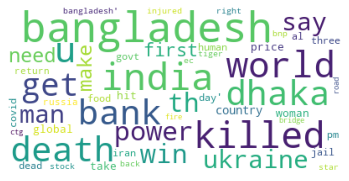

In [22]:
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [23]:
fig.savefig("word1.png", dpi=900)

#### Text Preparation
- Tokenization
- Vectorization

#### Creating a vector of word counts

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
cv = CountVectorizer(
    max_df=0.8,
    stop_words=stop_words,
    max_features=1000,
    ngram_range=(1,3)
)

In [26]:
X = cv.fit_transform(corpus)

In [27]:
list(cv.vocabulary_.keys())[:10]

['crisis',
 'global',
 'economic',
 'environment',
 'remembering',
 'queen',
 'suffering',
 'vandalised',
 'attack',
 'bcl']

#### Visualizing top N uni-grams,bi-grames and tri_grams

[Text(0, 0, 'bangladesh'),
 Text(1, 0, 'world'),
 Text(2, 0, 'india'),
 Text(3, 0, 'dhaka'),
 Text(4, 0, 'killed'),
 Text(5, 0, 'death'),
 Text(6, 0, 'win'),
 Text(7, 0, 'bank'),
 Text(8, 0, 'day'),
 Text(9, 0, 'get'),
 Text(10, 0, 'power'),
 Text(11, 0, 'men'),
 Text(12, 0, 'iran'),
 Text(13, 0, 'covid'),
 Text(14, 0, 'price'),
 Text(15, 0, 'govt'),
 Text(16, 0, 'ctg'),
 Text(17, 0, 'th'),
 Text(18, 0, 'woman'),
 Text(19, 0, 'need')]

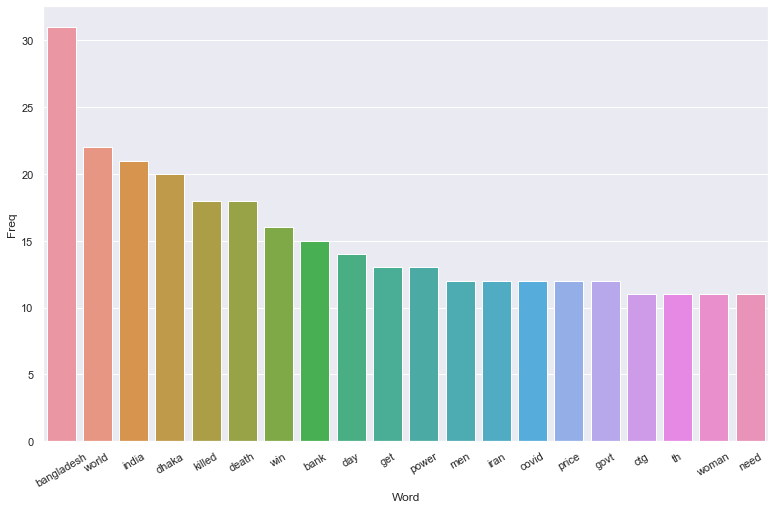

In [28]:
# Most frequently occuring words
import seaborn as sns


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0)

    words_freq = [
        (word, sum_words[0, idx]) for word, idx in
        vec.vocabulary_.items()
    ]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns = ["Word", "Freq"]

#Barplot of most freq words
sns.set(rc={'figure.figsize': (13, 8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

             Bi-gram  Freq
0          world cup     7
1            bcl men     6
2      mental health     6
3    positivity rate     5
4          pass away     5
5    chhatra odhikar     4
6      hr positivity     4
7        nobel prize     4
8     gaibandha poll     4
9   odhikar parishad     3
10         sent jail     3
11        road crash     3
12          year old     3
13       killed road     3
14    body recovered     3
15       covid death     3
16       missing day     3
17   fdc environment     3
18       mahsa amini     3
19       debt crisis     3


[Text(0, 0, 'world cup'),
 Text(1, 0, 'bcl men'),
 Text(2, 0, 'mental health'),
 Text(3, 0, 'positivity rate'),
 Text(4, 0, 'pass away'),
 Text(5, 0, 'chhatra odhikar'),
 Text(6, 0, 'hr positivity'),
 Text(7, 0, 'nobel prize'),
 Text(8, 0, 'gaibandha poll'),
 Text(9, 0, 'odhikar parishad'),
 Text(10, 0, 'sent jail'),
 Text(11, 0, 'road crash'),
 Text(12, 0, 'year old'),
 Text(13, 0, 'killed road'),
 Text(14, 0, 'body recovered'),
 Text(15, 0, 'covid death'),
 Text(16, 0, 'missing day'),
 Text(17, 0, 'fdc environment'),
 Text(18, 0, 'mahsa amini'),
 Text(19, 0, 'debt crisis')]

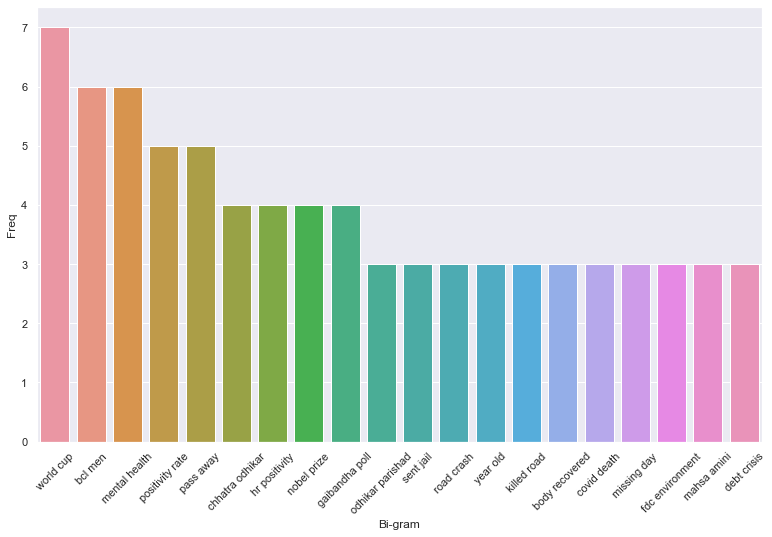

In [29]:
#Most frequently occuring Bi-grams

def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2, 2),
                           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize': (13, 8)})
h = sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)


                      Tri-gram  Freq
0           hr positivity rate     4
1     chhatra odhikar parishad     3
2    odhikar parishad activist     2
3              output cut show     2
4             rift biden saudi     2
5            biden saudi royal     2
6   bangladesh wedding couture     2
7         wedding couture week     2
8            couture week bwcw     2
9            killed road crash     2
10         dengue grip rooppur     2
11          grip rooppur plant     2
12              death toll hit     2
13        everything need know     2
14      bangladeshi killed bsf     2
15                 top la liga     2
16              covid death hr     2
17         death hr positivity     2
18         strike ukraine city     2
19          dengue fever death     2


[Text(0, 0, 'hr positivity rate'),
 Text(1, 0, 'chhatra odhikar parishad'),
 Text(2, 0, 'odhikar parishad activist'),
 Text(3, 0, 'output cut show'),
 Text(4, 0, 'rift biden saudi'),
 Text(5, 0, 'biden saudi royal'),
 Text(6, 0, 'bangladesh wedding couture'),
 Text(7, 0, 'wedding couture week'),
 Text(8, 0, 'couture week bwcw'),
 Text(9, 0, 'killed road crash'),
 Text(10, 0, 'dengue grip rooppur'),
 Text(11, 0, 'grip rooppur plant'),
 Text(12, 0, 'death toll hit'),
 Text(13, 0, 'everything need know'),
 Text(14, 0, 'bangladeshi killed bsf'),
 Text(15, 0, 'top la liga'),
 Text(16, 0, 'covid death hr'),
 Text(17, 0, 'death hr positivity'),
 Text(18, 0, 'strike ukraine city'),
 Text(19, 0, 'dengue fever death')]

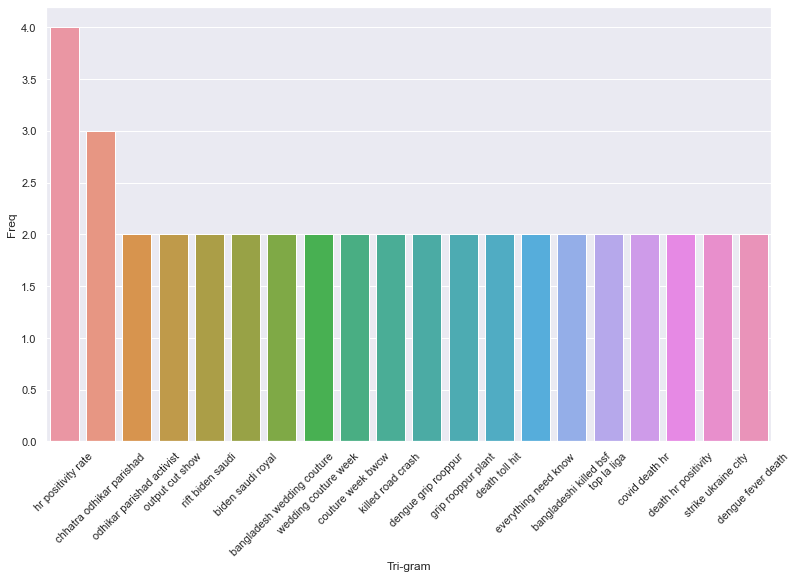

In [30]:
#Most frequently occuring Tri-grams

def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3, 3),
                           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
sns.set(rc={'figure.figsize': (13, 8)})
j = sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)


#### Converting to a Matrix of Integers
- TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(
    smooth_idf=True,
    use_idf=True
)

tfidf_transformer.fit(X)

TfidfTransformer()

In [32]:
# Get feature names
feature_names = cv.get_feature_names_out()

# fetch document for which keywords needs to be extracted
doc=corpus[32]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [33]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [34]:
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nHeadline:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Headline:
year old gang raped kamalapur station arrested

Keywords:
kamalapur 0.359
gang raped 0.359
year old 0.343
station 0.343
raped 0.343
